In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

https://www.kaggle.com/yelp-dataset/yelp-dataset/version/6
    
This dataset is a subset of Yelp's businesses, reviews, and user data. It was originally put together for the Yelp Dataset Challenge which is a chance for students to conduct research or analysis on Yelp's data and share their discoveries. In the dataset you'll find information about businesses across 11 metropolitan areas in four countries. 

In [6]:
# load the CSV file
yelp = pd.read_csv('yelp.csv')

In [7]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [8]:
# check the number of entries
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [9]:
# check summary of data
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [10]:
# add text length of each text to a new column
yelp['text length'] = yelp['text'].apply(len)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


## Data Visualization

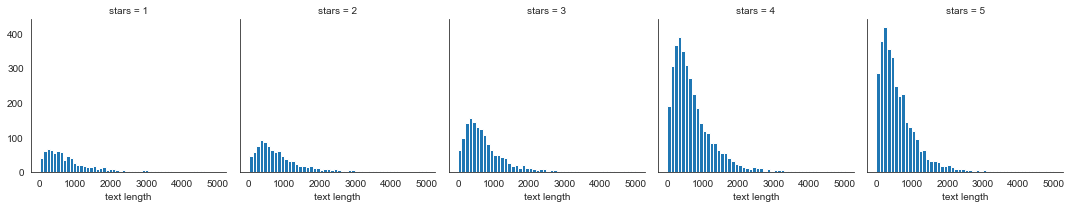

In [11]:
sns.set_style('white')

# use Facet grid to show histogram of text length vs. star ratings
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length', bins=50)

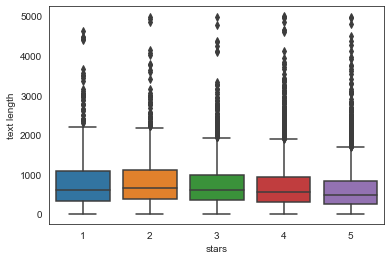

In [12]:
# create boxplot for text length vs. star rating
sns.boxplot(x='stars',y='text length', data=yelp)

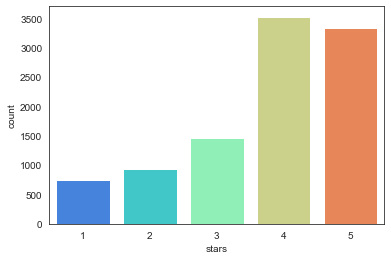

In [13]:
# create countplot for each star rating
sns.countplot(x='stars',data=yelp,palette='rainbow')

In [14]:
# show the average values of each numerical columns
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [15]:
# check if how correlated the stars to each other
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


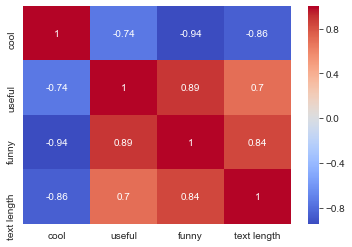

In [16]:
# use heatmap to visuallize the correlation method
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

## NLP Classification

In [17]:
 # Create dataframe that contains only star reviews 1 or 5
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
# yelp_class = yelp
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
business_id    4086 non-null object
date           4086 non-null object
review_id      4086 non-null object
stars          4086 non-null int64
text           4086 non-null object
type           4086 non-null object
user_id        4086 non-null object
cool           4086 non-null int64
useful         4086 non-null int64
funny          4086 non-null int64
text length    4086 non-null int64
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [18]:
# create 'X' and 'y' objects to be used to train the classifier
X = yelp_class['text']
y = yelp_class['stars']

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

x_data = cv.fit_transform(X)

In [20]:
# Split data for train and test 
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.33, random_state=42)

## Train a model
### Use Naive bayes Classifier

In [21]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [22]:
# fit the model from the training data
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
# Predict the model with X_test data
predictions = mnb.predict(X_test)

## Create confusion matrix and classification report

![title](../confusion_matrix.png)

In [24]:
# Show confusion matrix guide
# import matplotlib.image as mpimg
# image = mpimg.imread("../confusion_matrix.png")
# plt.imshow(image)
# plt.show()

# import confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predictions))
print('-----------------------------------------------------------')
print(classification_report(y_test, predictions))

[[ 163   98]
 [  32 1056]]
-----------------------------------------------------------
              precision    recall  f1-score   support

           1       0.84      0.62      0.71       261
           5       0.92      0.97      0.94      1088

    accuracy                           0.90      1349
   macro avg       0.88      0.80      0.83      1349
weighted avg       0.90      0.90      0.90      1349



## Practice using the Pipeline

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('classifier', MultinomialNB())
])

In [57]:
# Re-do 

# create 'X' and 'y' objects to be used to train the classifier
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [58]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [59]:
# Predict the model with X_test data
predictions = pipeline.predict(X_test)

In [60]:
print(confusion_matrix(y_test, predictions))
print('-----------------------------------------------------------')
print(classification_report(y_test, predictions))

[[155  73]
 [ 15 983]]
-----------------------------------------------------------
              precision    recall  f1-score   support

           1       0.91      0.68      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.92      0.83      0.87      1226
weighted avg       0.93      0.93      0.92      1226

